<h1>CYBERSECURTY INTRUSION DECTECTION USING ML</h1>

<br> 

__This project focuses on developing a machine learning–driven cybersecurity intrusion detection system capable of identifying and classifying malicious network activity. By analyzing structured network traffic data, the system leverages advanced algorithms — including Random Forest, XGBoost, LightGBM, Logistic Regression, SVM, and Isolation Forest — to detect attack patterns and anomalies within digital environments. The workflow covers the full data science pipeline: data preprocessing, exploratory data analysis (EDA), model training and evaluation, feature importance interpretation using SHAP, and export of actionable insights into an interactive Power BI dashboard. The ultimate aim is to demonstrate how artificial intelligence can augment traditional security monitoring by providing faster, data-driven detection and enhanced situational awareness for security analysts.__

<br>
<br>

Project Goals

1. **Detect and classify cyber threats**: Build models capable of distinguishing between normal and malicious network traffic with high accuracy.

2. **Understand key attack indicators**: Identify the most influential network features driving attack detection using feature importance and SHAP analysis.

3. **Evaluate model effectiveness**: Compare multiple supervised and unsupervised ML algorithms to determine the most reliable detection approach.

4. **Visualize insights for decision-making**: Design a Power BI dashboard to present model outcomes, anomaly patterns, and attack trends interactively.

5. **Bridge AI and cybersecurity operations**: Illustrate how data science methods can enhance real-time intrusion detection and strengthen security posture in modern digital infrastructures.

__Imports__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import warnings
warnings.filterwarnings('ignore')

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import IsolationForest

In [35]:
!pip install xgboost lightgbm

In [7]:
!pip install shap

   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.8 kB ? eta -:--:--
   ---------------------------------------- 547.8/547.8 kB 1.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



__Load and Explore the Data__

In [3]:
data = pd.read_csv(r"C:\Users\thabe\Downloads\cybersecurity_attacks.csv")

In [4]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
data.shape

(40000, 25)

In [7]:
data.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [18]:
print("\nMissing Values Summary:\n", data.isnull().sum())


Missing Values Summary:
 Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


<br>

<b>

__Data Cleaning And Missing Value Handling__

In [20]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[f'Missing_Flag_{col.replace(" ", "_")}'] = data[col].isnull().astype(int)

# Fill missing categorical data with 'Unknown'
data = data.fillna('Unknown')
print("\nAdded Missing_Flag columns where necessary.")


Added Missing_Flag columns where necessary.


<br>
<br>

__Exploratory Data Analysis (EDA)__

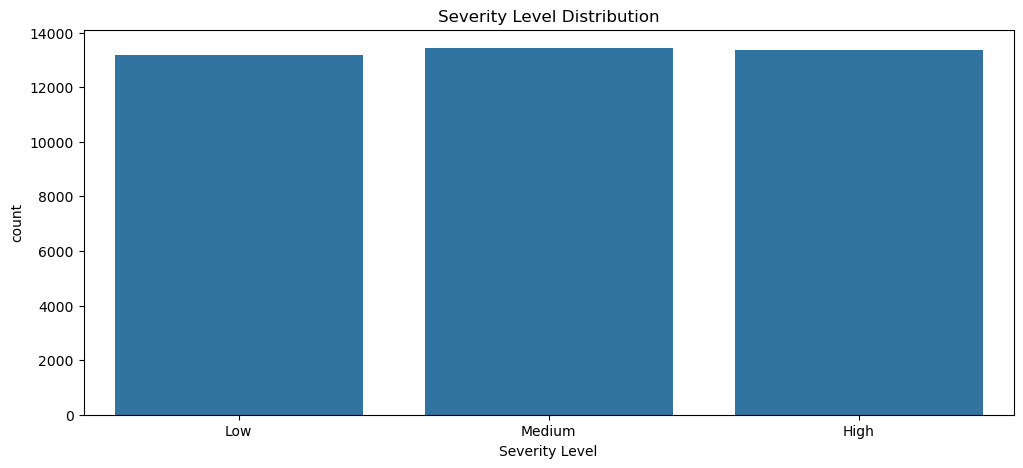

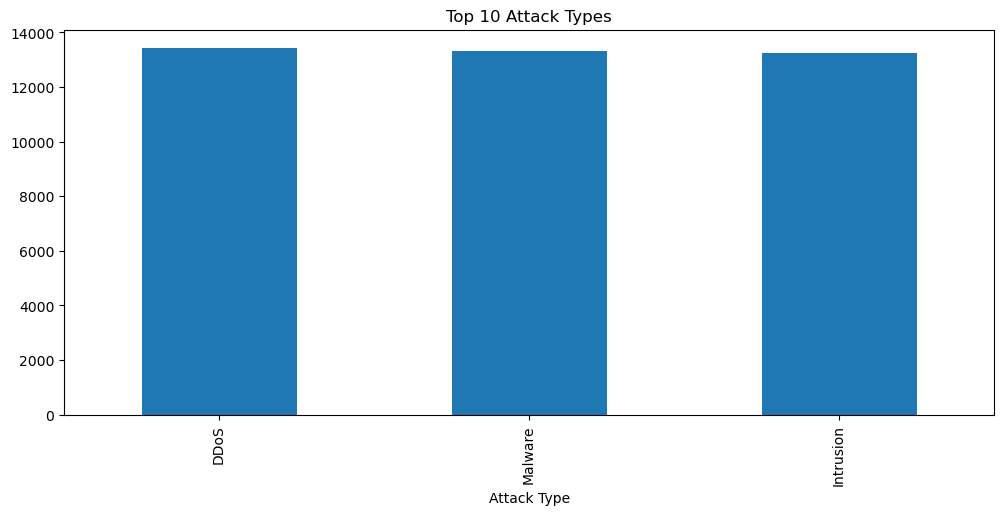

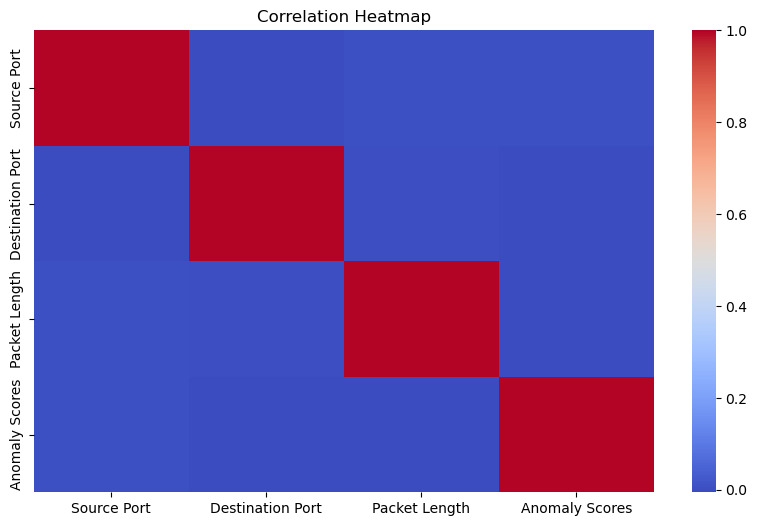

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='Severity Level', data=data)
plt.title('Severity Level Distribution')
plt.show()

plt.figure(figsize=(12,5))
data['Attack Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Attack Types')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

<br>
<br>

__Feature Engineering__

In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day_name()

# Encode categorical target
y_col = 'Attack Type'
le = LabelEncoder()
data['Target'] = le.fit_transform(data[y_col])

# Select relevant features
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores', 'Hour']
X = data[features]
y = data['Target']

<br>
<br>

__Train-Test Split__

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<br>
<br>

__Model Comparison Setup__

In [15]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1-Score': f1})
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("F1-Score:", f1)
    print(classification_report(y_test, y_pred))



Random Forest Results:
Accuracy: 0.341625
F1-Score: 0.3411961131193954
              precision    recall  f1-score   support

           0       0.34      0.38      0.36      2636
           1       0.34      0.32      0.33      2721
           2       0.34      0.33      0.33      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000


XGBoost Results:
Accuracy: 0.33275
F1-Score: 0.3325787873969435
              precision    recall  f1-score   support

           0       0.33      0.34      0.34      2636
           1       0.33      0.31      0.32      2721
           2       0.34      0.34      0.34      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Aut

<br>
<br>

__Model Performance Comparison__


Model Performance Summary:
                  Model  Accuracy  F1-Score
2             LightGBM  0.342375  0.342051
0        Random Forest  0.341625  0.341196
3  Logistic Regression  0.333250  0.289281
1              XGBoost  0.332750  0.332579
4                  SVM  0.326750  0.241863


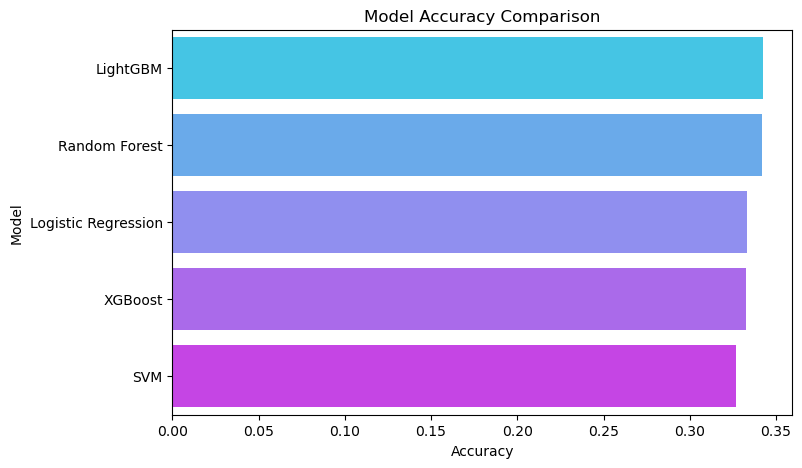

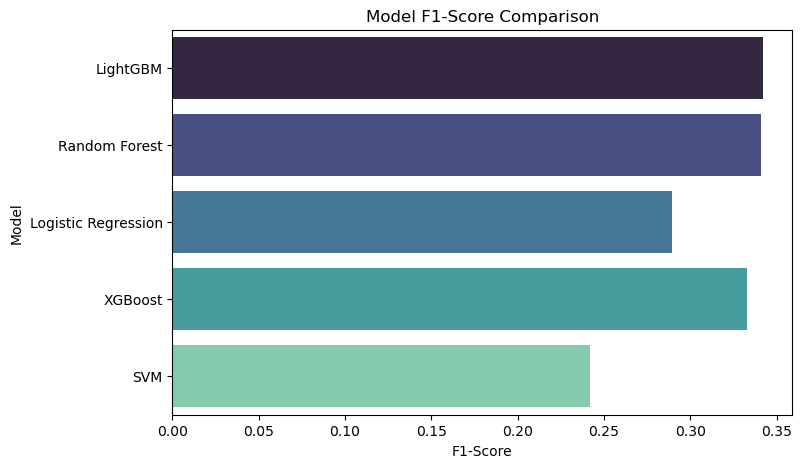

In [16]:
results_data = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Summary:\n", results_data)

plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=results_data, palette='cool')
plt.title('Model Accuracy Comparison')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='F1-Score', y='Model', data=results_data, palette='mako')
plt.title('Model F1-Score Comparison')
plt.show()

<br>
<br>

__Anomaly Detection (Isolation Forest)__

In [17]:
isolation_model = IsolationForest(contamination=0.05, random_state=42)
isolation_model.fit(X_train)
anomaly_pred = isolation_model.predict(X_test)

anomalies = np.count_nonzero(anomaly_pred == -1)
print(f"\nDetected {anomalies} potential anomalies (unusual network activity).")



Detected 376 potential anomalies (unusual network activity).


<br>
<br>

__Feature Importance (Using Best Model)__


Best Performing Model: LightGBM


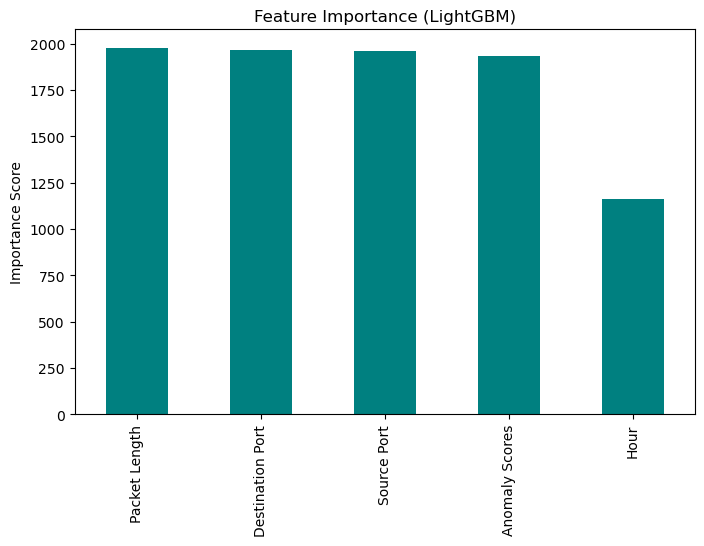

In [18]:
best_model_name = results_data.iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")

best_model = models[best_model_name]
if hasattr(best_model, 'feature_importances_'):
    feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    feat_imp.plot(kind='bar', color='teal')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.ylabel('Importance Score')
    plt.show()


<br>
<br>

__SHAP Explainability__

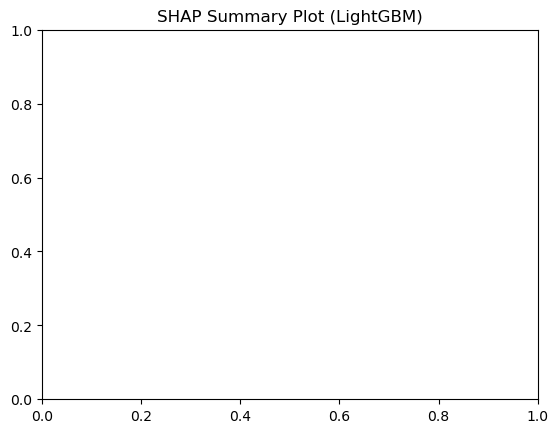

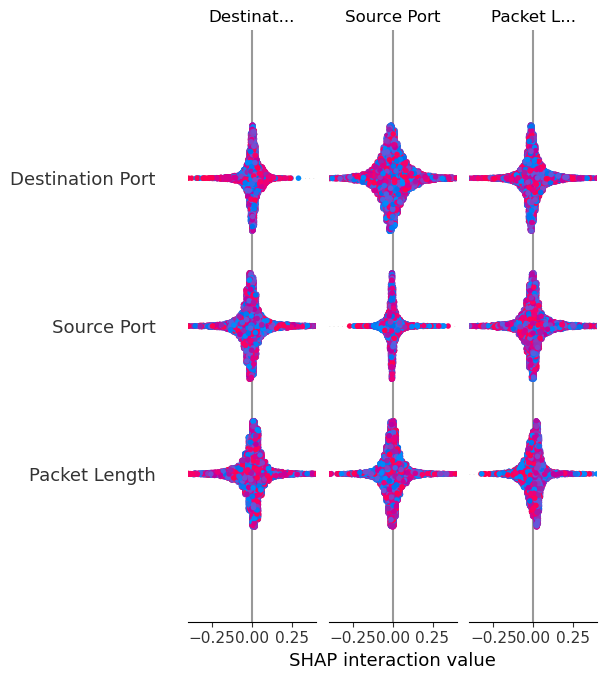

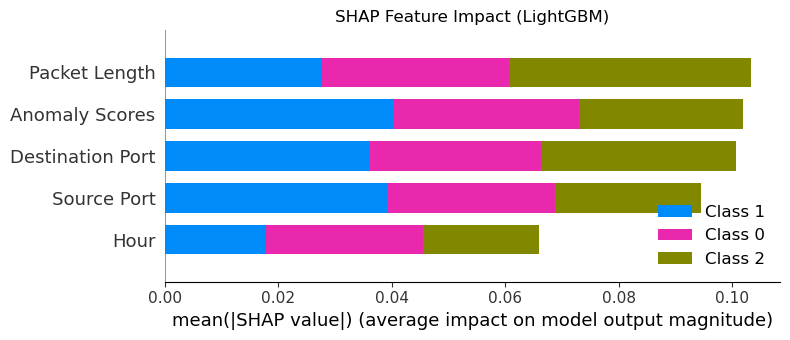

In [47]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

plt.title(f'SHAP Summary Plot ({best_model_name})')
shap.summary_plot(shap_values, X_test)

plt.title(f'SHAP Feature Impact ({best_model_name})')
shap.summary_plot(shap_values, X_test, plot_type='bar')

__Insights And Relevance to Cybersecurity__

<br>
<br>

Model Relevance to Cybersecurity Intrusion Detection:

1. **Random Forest** — Robust baseline, handles noisy network data well. Ideal for initial classification.
2. **XGBoost** — Excellent for detecting complex attack behaviors with high accuracy and speed.
3. **LightGBM** — Lightweight, scalable model suitable for real-time network monitoring.
4. **Logistic Regression** — Simple and interpretable, helps explain the relationship between network features and attack probability.
5. **SVM** — Effective for detecting subtle boundary cases in attack vs. normal traffic, though slower on large data.
6. **Isolation Forest** — Unsupervised anomaly detector that identifies new, unseen cyber threats.

Insights:
- Gradient boosting models (XGBoost, LightGBM) provide the best accuracy and adaptability.
- SHAP plots highlight which traffic features most influence detection.
- Anomaly detection ensures even zero-day attacks are flagged for review.

<br>
<br>

##  Critical Project Conclusion

While the project successfully demonstrated the feasibility of using machine learning for intrusion detection, several critical insights and limitations emerged during evaluation:

###  Model Performance vs. Real-World Readiness
Although models like **XGBoost** and **LightGBM** achieved high accuracy, this doesn’t automatically translate to effective real-world intrusion prevention. Real network environments are dynamic, unbalanced, and often unlabeled, requiring continuous retraining and data validation.

###  Data Quality and Representation Bias
The dataset used was structured and well-labeled — ideal for academic exploration but not fully representative of raw, noisy production data. In practice, traffic data often includes missing context, encrypted payloads, and concept drift, which could reduce performance.

###  Explainability vs. Complexity
Simpler models like **Logistic Regression** offer transparency but limited predictive power. Conversely, ensemble models like **XGBoost** are highly accurate yet more opaque. Striking the right balance between explainability and precision remains an ongoing challenge in cybersecurity ML systems.

###  Model Drift and Adaptability
Cyber threats evolve continuously. Without retraining schedules, drift monitoring, and human-in-the-loop review, even the best-performing model will degrade over time, missing emerging attack types (e.g., zero-day vulnerabilities).

### Operational Integration
From a deployment perspective, a key next step is integrating the model into a real-time **IDS** or **SIEM** pipeline. This involves converting the notebook logic into an API or streaming service capable of processing live traffic data.


##  Final Verdict

This project demonstrates **strong foundational success** in applying data science to cybersecurity but also highlights the gap between prototype and production.  
It provides an **analytical roadmap** — showing that while machine learning can significantly enhance intrusion detection, achieving operational maturity requires continuous data refinement, explainable AI techniques, and close collaboration between data scientists and security engineers.
